<a href="https://colab.research.google.com/github/diksham1/image-lab/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Processing Lab Assignment 1

In [60]:
import numpy as np; 
import matplotlib.pyplot as plt;
import skimage;
from skimage import io
import skimage.measure as measure
import cv2

In [51]:
# Constants used

BASE_FILE_PATH = '/content/'
DOWNSAMPLING_FACTOR = 2;

In [25]:
def showImage(image):
  plt.imshow(image,aspect="auto", cmap='gray')
  plt.show()

In [9]:
# Upload and display the images
from google.colab import files

uploaded = files.upload()

Saving ba256.dat to ba256.dat


In [10]:
filename = list(uploaded.keys())[0];

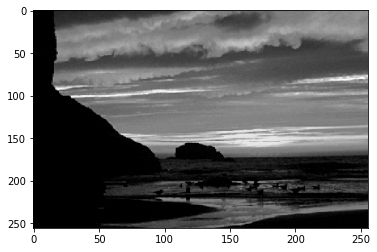

In [26]:
image = np.loadtxt(filename)
showImage(image)

##Question 1

Write a program to show the minimum and the maximum pixel values of an 8 bits/pixel grayscale image. Also write a program to convert grayscale image to a binary image using threshold (Tth) operation where

$$Tth = \frac{min(pixel value) + max(pixel value)}{2}$$.

Mathematically, 

    G(x,y) = 0 if f(x,y) ≤ (minimum gray value + maximum gray value)/2
           = 1, otherwise

In [12]:
minPixelValue = image.max()
maxPixelValue = image.min()
threshold = (minPixelValue + maxPixelValue) / 2.0;

print("Minimum pixel value: " + str(minPixelValue))
print("Maximum pixel value: " + str(maxPixelValue))
print("Threshold          : " + str(threshold))

Minimum pixel value: 252.0
Maximum pixel value: 0.0
Threshold          : 126.0


In [13]:
# Grayscale to binary convertor function 

def gray2bin(pixelValue, threshold):
  if pixelValue <= threshold:
    return 0;
  else:
    return 1;


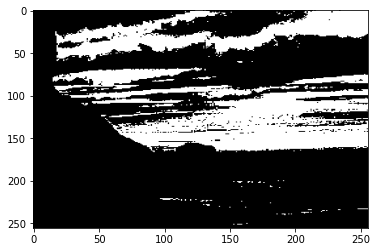

In [27]:
gray2bin_vec = np.vectorize(gray2bin)
binaryImage = gray2bin_vec(image, threshold)
showImage(binaryImage)

## Question 2

Write a program to implement down sampling of an image by a factor of 2. Apply the same effect for 2-3 successive times and comment on visual content. Finally, write a program to upscale the down sampled image through interpolation and comment on visual quality of the image.

###Downsampling Image

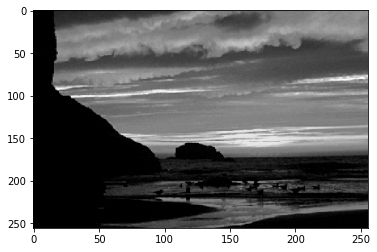

The original image


In [50]:
showImage(image)
print("The original image")

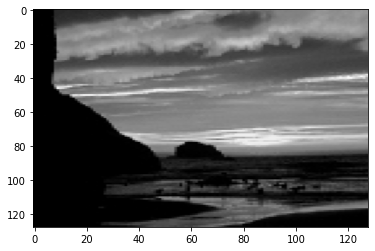

Downsampled once


In [57]:
tempimage = measure.block_reduce(image, (DOWNSAMPLING_FACTOR, DOWNSAMPLING_FACTOR), np.mean)
showImage(tempimage)
print("Downsampled once")

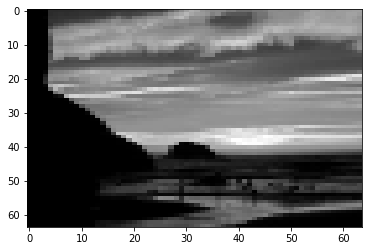

Downsampled twice


In [58]:
tempimage = measure.block_reduce(tempimage, (DOWNSAMPLING_FACTOR, DOWNSAMPLING_FACTOR), np.mean)
showImage(tempimage)
print("Downsampled twice")

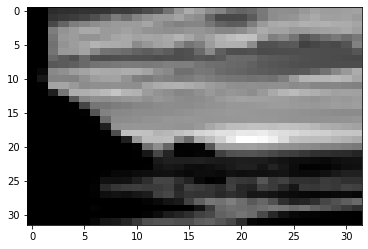

Downsampled thrice


In [59]:
tempimage = measure.block_reduce(tempimage, (DOWNSAMPLING_FACTOR, DOWNSAMPLING_FACTOR), np.mean)
showImage(tempimage)
print("Downsampled thrice")

###Upsampled Image

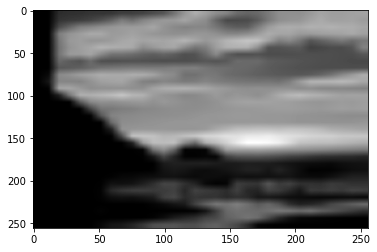

In [72]:
temp = cv2.resize(temp, image.shape, interpolation = cv2.INTER_LINEAR);
showImage(temp)